# Ejercicio OpenStreetMap
Para este ejercicio vas a trabar con Overpass, que es la API que utiliza los datos de OpenStreetMap. Tras obtener datos geográficos mediante la API, tendrás que representarlos con Plotly.

Hay que obtener los siguientes datos de cada ubicación conseguida en OpenStreetMap
* tipo de amenity
* latitud
* longitud
* nombre
* direccion

**NOTA**: En este Notebook utilizarás gráficas de Plotly, y JupyterLab de momento no lo soporta, a no ser que instales una extensión. Para solucionar esto, abre el Notebook desde Jupyter normal:

![imagen](./img/jupyter.png)

Tienes en [este enlace](https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare) la lista de *amenities* que vas a usar en el notebook.

## Instalación
Si no tienes instalado Plotly, abre un terminal y escribe:
```
pip install plotly
```

Importa las librerias que vamos a usar en el Notebook

In [1]:
import requests
import json
import pandas as pd

Ataca a la API de OpenStreetmap con el siguiente código de ejemplo

In [2]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="ice_cream"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [5]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.58.2 2b5354b1',
 'osm3s': {'timestamp_osm_base': '2022-06-02T07:25:42Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': []}

Con el siguiente código podrás adaptar el JSON que devuelve la API, a un formato DataFrame más amigable

In [3]:
def json_to_df(data):
    elements = data['elements']
    places = {'tipo': [], 'lat': [], 'lon': [], 'name': [], 'address': []}
    
    for i in elements:
        
        tipo = i.get('tags', None).get('amenity', None)
        latitude = i.get('lat', None)
        longitude = i.get('lon', None)
        name = i.get('tags', {}).get('name', "NO NAME")
        street = i.get('tags', {}).get('addr:street', "NO STREET")
        number = i.get('tags', {}).get('addr:housenumber', 9999)

        places['tipo'].append(tipo)
        places['lat'].append(latitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(street + ' ' + str(number))

            
    return pd.DataFrame(places)

Utilizarás esta función para representar los datos en un mapa de Matplotlib

In [4]:
import plotly.express as px

mapbox_access_token = "pk.eyJ1IjoiZGFvcnRpIiwiYSI6ImNrZnF6M3FlczA3cDEyem16YTNzZmV4M2EifQ.846iF0sMSAXv0kwkwUTYjg"

def pinta_mapa(df):
    fig = px.scatter_mapbox(df,
                            lat="lat",
                            lon="lon",
                            color = "tipo",
                      color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=11)
    fig.update_layout(
        mapbox=dict(
            accesstoken=mapbox_access_token
        )
    )

    fig.show()

Como ejemplo, si quiero ver cuántos restaurantes tengo cerca de The Bridge:

In [6]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="restaurant"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()
df = json_to_df(data)
df

<Response [200]>


,tipo,lat,lon,name,address
0,restaurant,40.423086,-3.693547,La Castafiore,NO STREET 9999
1,restaurant,40.422607,-3.693256,Sake Dining Himawari,NO STREET 9999
2,restaurant,40.423315,-3.692506,Ainhoa,Calle de Doña Bárbara de Braganza 12
3,restaurant,40.421960,-3.694270,La Kitchen,NO STREET 9999
4,restaurant,40.421956,-3.693905,En La Gloria,Calle de Prim 9
5,restaurant,40.423695,-3.691651,Café Espejo,NO STREET 9999
6,restaurant,40.421951,-3.693535,Tampu,Calle de Prim 13
7,restaurant,40.422266,-3.694097,Casa Gades,Calle del Conde de Xiquena 4
8,restaurant,40.423151,-3.694062,El Cano de Xiquena,NO STREET 9999
9,restaurant,40.423345,-3.692632,El Gato Persa,Calle de Doña Bárbara de Braganza 10


In [7]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.58.2 2b5354b1',
 'osm3s': {'timestamp_osm_base': '2022-06-02T07:40:55Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 305536401,
   'lat': 40.4230858,
   'lon': -3.6935468,
   'tags': {'amenity': 'restaurant', 'name': 'La Castafiore'}},
  {'type': 'node',
   'id': 324580483,
   'lat': 40.4226068,
   'lon': -3.6932565,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'japanese',
    'name': 'Sake Dining Himawari'}},
  {'type': 'node',
   'id': 3361315181,
   'lat': 40.4233148,
   'lon': -3.6925055,
   'tags': {'addr:city': 'Madrid',
    'addr:housenumber': '12',
    'addr:postcode': '28004',
    'addr:street': 'Calle de Doña Bárbara de Braganza',
    'addr:subdistrict': 'Justicia',
    'amenity': 'restaurant',
    'cuisine': 'regional',
    'name': 'Ainhoa',
    'phone': '+34 913 08 27 26',
    'website': 'http://resta

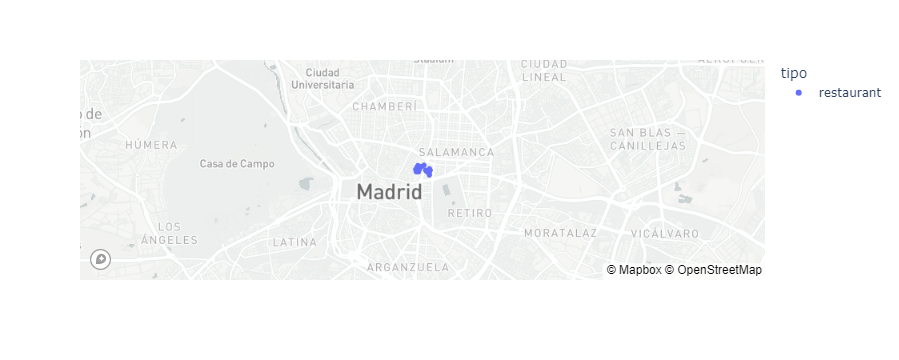

In [8]:
pinta_mapa(df)

## Ejercicio 1
### Búsqueda de aparcamiento
Para este caso de uso imagina que vas a Madrid de viaje y estás buscando posibles parkings donde dejar el coche, crea un DataFrame con todos los parkings (de OpenStreetMap) de la ciudad de Madrid. Para ello define una cuadrícula con dos coordenadas sobre Madrid.

Representa en un mapa los resultados

<Response [200]>


,tipo,lat,lon,name,address
0,parking,38.550493,-0.125530,Estació d'Autobusos,NO STREET 9999
1,parking,38.545035,-0.103045,NO NAME,NO STREET 9999
2,parking,38.544652,-0.101997,NO NAME,NO STREET 9999
3,parking,38.572438,-0.125077,NO NAME,NO STREET 9999
4,parking,38.579813,-0.104364,NO NAME,NO STREET 9999
5,parking,38.580023,-0.100834,NO NAME,NO STREET 9999
6,parking,38.548000,-0.113650,NO NAME,NO STREET 9999
7,parking,38.547443,-0.115726,NO NAME,NO STREET 9999
8,parking,38.548963,-0.106937,NO NAME,NO STREET 9999
9,parking,38.549196,-0.107216,NO NAME,NO STREET 9999


## Mudanza
Imagina que te quieres mudar al Berrueco, pero antes te gustaría obtener algún indicador de si hay civilización por esa zona. Mira a ver si existe gasolineras y/o colegios por la zona. Define, al igual que en el caso anterior, un rectángulo mediante dos coordenadas. Busca la manera de realizar una única petición a la API.

Representa después en un mapa, por color los colegios y gasolineras

<Response [200]>


,tipo,lat,lon,name,address
0,fuel,40.905376,-3.607588,Repsol,NO STREET 9999
1,fuel,40.906677,-3.610172,Shell,CTRA. N-I KM 64.650 9999
2,fuel,40.856872,-3.612894,Repsol,"AVDA. GENERALISIMO,12 9999"
3,fuel,40.875833,-3.602389,Shell,Avenida de La Cabrera 9999
4,school,40.867720,-3.614696,Escuela infantil de La Cabrera,NO STREET 9999
5,school,40.855890,-3.483306,Patones,NO STREET 9999
6,school,40.872876,-3.606421,La Cabrera,NO STREET 9999
7,school,40.864566,-3.614058,Eq. Aten.Temprana La Cabrera-Lozoyuela,NO STREET 9999
8,school,40.872395,-3.608802,C.A.P. De La Cabrera,NO STREET 9999
9,school,40.863864,-3.615523,Equipo General La Cabrera,NO STREET 9999


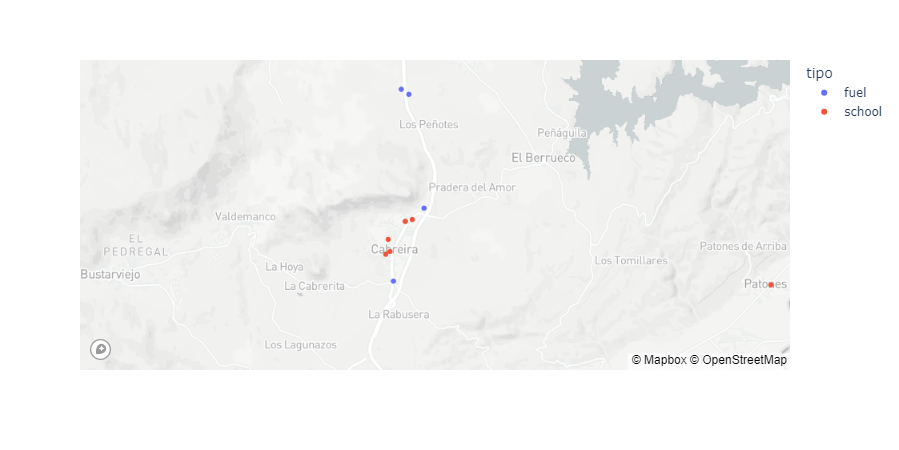

## Zonas COVID
Imagina que trabajas en el ayuntamiento de tu barrio/pueblo/ciudad, y por motivos del COVID tienes que identificar:
1. Todas las zonas abiertas de uso común (zonas de barbacoas, fuentes de agua y parques infantiles (kindergarten)), para cerrarlas.
2. Todos los hospitales y clínicas de la zona.

Como no sabes muy bien qué puntos serán, utilizas la API de OpenStreetMap. Representa todo en un único mapa

<Response [200]>


,tipo,lat,lon,name,address
0,drinking_water,40.413707,-3.695723,NO NAME,NO STREET 9999
1,drinking_water,40.412405,-3.691392,NO NAME,NO STREET 9999
2,drinking_water,40.411579,-3.711331,NO NAME,NO STREET 9999
3,drinking_water,40.413810,-3.709083,NO NAME,NO STREET 9999
4,drinking_water,40.444679,-3.708382,NO NAME,NO STREET 9999
...,...,...,...,...,...
210,kindergarten,40.447935,-3.704028,Chiquitín Cuatro Caminos,NO STREET 9999
211,kindergarten,40.434118,-3.709672,Escuela infantil municipal Fernando el Católico,Calle de Fernando el Católico 16B
212,kindergarten,40.424440,-3.706083,Family Moon,Calle de Minas 6
213,kindergarten,40.433793,-3.695049,St. Alice's nursery,Calle de Fernández de la Hoz 21


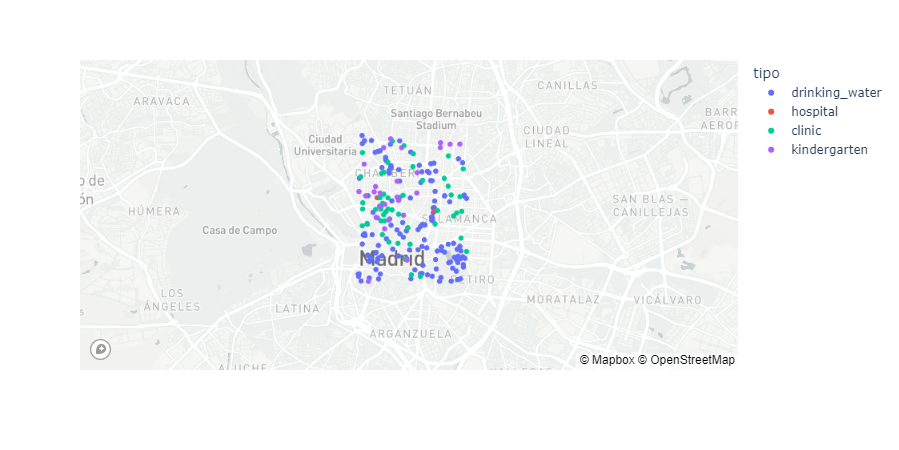

## Supermercados
Para este ejemplo supondrás que trabajas en una cadena de supermercados en la que se está planteando construir un nuevo local en la provincia de Sevilla. Busca mediante la API de Overpass todos los supermercados de la provincia para poder comprobar en qué nucleos urbanos habría poca competencia.

En este caso hay que buscar por área, no por cuadrícula! Investiga en la documentación/Stackoverflow cómo se haría eso.

<Response [200]>


,tipo,lat,lon,name,address
0,None,37.373002,-6.047204,MAS,NO STREET 9999
1,None,37.390016,-5.973769,Maxi Dia,NO STREET 9999
2,None,36.994532,-5.572320,Dia,NO STREET 9999
3,None,37.406364,-5.976342,El Jamón,NO STREET 9999
4,None,37.406508,-5.973342,Valdejimena,Avenida de San Juan de la Salle 9999
...,...,...,...,...,...
485,None,NaN,NaN,NO NAME,NO STREET 9999
486,None,NaN,NaN,Lidl,NO STREET 9999
487,None,NaN,NaN,Mercadona,NO STREET 9999
488,None,NaN,NaN,Alacasa,Calle de Villamartín 9999


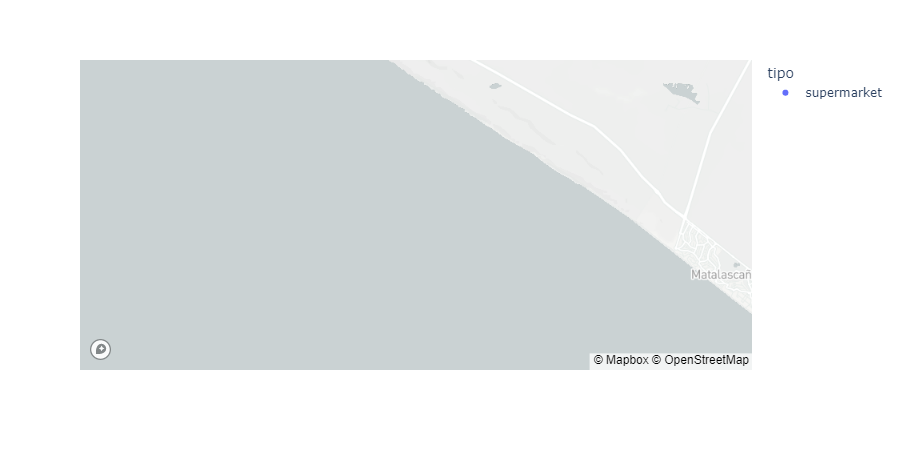

## Etiqueta en el mapa
Busca la manera de modificar la función `pinta_mapa()`, de tal manera que cuando pases el ratón por encima de cada punto, aparezca el nombre de cada nodo. Por ejemplo, que en el último apartado aparezcan los nombres de los supermercados.

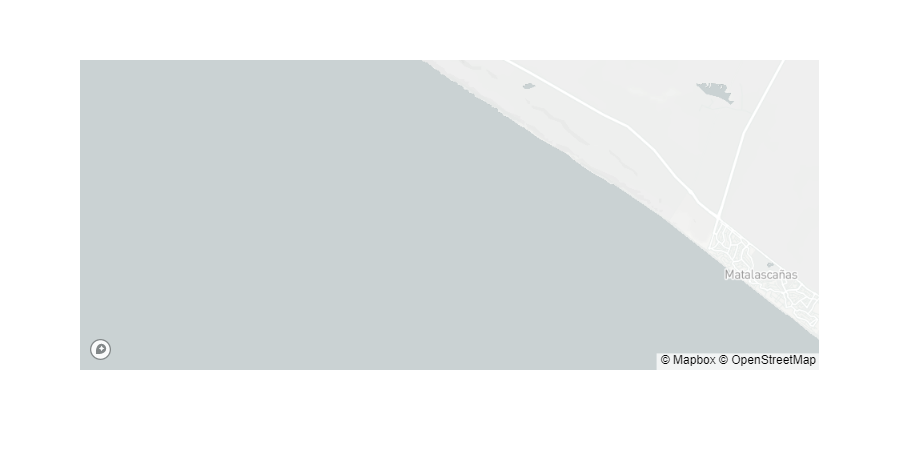